In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
import h5py

In [ ]:
# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

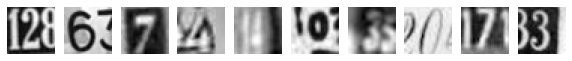

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [ ]:
#Data preparation
#Print the first image in the train image and figure out the shape of the images
#Normalise the train and the test dataset by dividing by 255
#Print the new shapes of the train and the test set
#One-hot encode the target variable
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [ ]:
#Question 1: Normalize the train and test data (2 Marks)
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

In [ ]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [ ]:
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#Model Building
#Now, we have done the data preprocessing, let's build an ANN model.

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Write a function that returns a sequential model with the following architecture
#First hidden layer with 64 nodes and relu activation and the input shape which is used above
#Second hidden layer with 32 nodes and relu activation
#Output layer with softmax activation and number of nodes equal to the number of classes -Compile the model with the categorical_crossentropy loss, adam optimizer (learning_rate = 0.001), and accuracy metric. Do not fit the model here, just return the compiled model.
#Call the function and store the model in a new variable
#Print the summary of the model
#Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and 20 epochs. Store the model building history to use later for visualization.

In [ ]:
#Question 2: Build and train a ANN model as per the above mentioned architecture (10 Marks)
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Dense(64, activation='relu', input_shape=(1024,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001 
    Adam = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    
    return model

In [ ]:
# Build the model
model_1 = nn_model_1()

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                65600     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_model_1 = model_1.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=20,
                    verbose=1)

Epoch 1/20
1050/1050 [==============================] - 4s 3ms/step - loss: 2.2053 - accuracy: 0.1682 - val_loss: 1.9107 - val_accuracy: 0.3076
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 1.7297 - accuracy: 0.3827 - val_loss: 1.5754 - val_accuracy: 0.4625
Epoch 3/20
1050/1050 [==============================] - 3s 3ms/step - loss: 1.4992 - accuracy: 0.4962 - val_loss: 1.5013 - val_accuracy: 0.4924
Epoch 4/20
1050/1050 [==============================] - 3s 3ms/step - loss: 1.3699 - accuracy: 0.5538 - val_loss: 1.3370 - val_accuracy: 0.5836
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 1.2768 - accuracy: 0.5967 - val_loss: 1.2394 - val_accuracy: 0.6126
Epoch 6/20
1050/1050 [==============================] - 3s 3ms/step - loss: 1.2164 - accuracy: 0.6216 - val_loss: 1.1955 - val_accuracy: 0.6311
Epoch 7/20
1050/1050 [==============================] - 3s 3ms/step - loss: 1.1679 - accuracy: 0.6387 - val_loss: 1.1813 - val_accuracy:

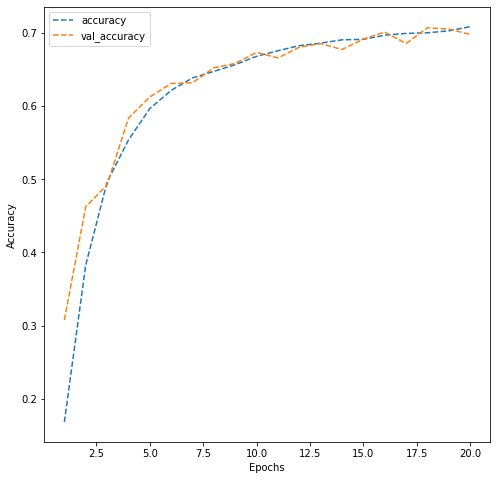

In [ ]:
#Question 3: Write your observations on the below plot (2 Marks)
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


Observations:
- The accuracy of the Epochs increases in a logorithmic fashion where although "Val_accuracy" is at a higher value than "Accuracy" before 7.5 Epochs. There are both essentially the same value after Epochs is greater than 7.5.

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Second Model Architecture
#Write a function that returns a sequential model with the following architecture
#First hidden layer with 256 nodes and relu activation
#Second hidden layer with 128 nodes and relu activation
#Add the Dropout layer with rate equal to 0.2
#Third hidden layer with 64 nodes and relu activation
#Fourth hidden layer with 64 nodes and relu activation
#Fifth hidden layer with 32 nodes and relu activation
#Add the BatchNormalization layer
#Output layer with softmax activation and number of nodes equal to the number of classes -Compile the model with the categorical_crossentropy loss, adam optimizer (learning_rate = 0.0005), and accuracy metric. Do not fit the model here, just return the compiled model.
#Call the function and store the model in a new variable
#Print the summary of the model
#Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs. Store the model building history to use later for visualization.

In [ ]:
#Question 4: Build and train the new ANN model as per the above mentioned architecture (10 Marks)
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_2():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.0005 
    Adam = tf.keras.optimizers.Adam(learning_rate=0.005)
    
    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
    
    return model

In [ ]:
# Build the model
model_2 = nn_model_2()

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               262400    
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Batc  (None, 32)              

In [ ]:
history_model_2 = model_2.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=30,batch_size= 128, verbose=1)

Epoch 1/30
263/263 [==============================] - 4s 11ms/step - loss: 2.3216 - accuracy: 0.1005 - val_loss: 2.3197 - val_accuracy: 0.0965
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 2.3086 - accuracy: 0.1010 - val_loss: 2.3117 - val_accuracy: 0.1012
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 2.3078 - accuracy: 0.1006 - val_loss: 2.3170 - val_accuracy: 0.0975
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 2.2652 - accuracy: 0.1222 - val_loss: 2.2360 - val_accuracy: 0.1583
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 2.0516 - accuracy: 0.1951 - val_loss: 1.9892 - val_accuracy: 0.2313
Epoch 6/30
263/263 [==============================] - 3s 9ms/step - loss: 1.9152 - accuracy: 0.2715 - val_loss: 1.7993 - val_accuracy: 0.3164
Epoch 7/30
263/263 [==============================] - 3s 10ms/step - loss: 1.7443 - accuracy: 0.3506 - val_loss: 1.6352 - val_accuracy: 0.3942


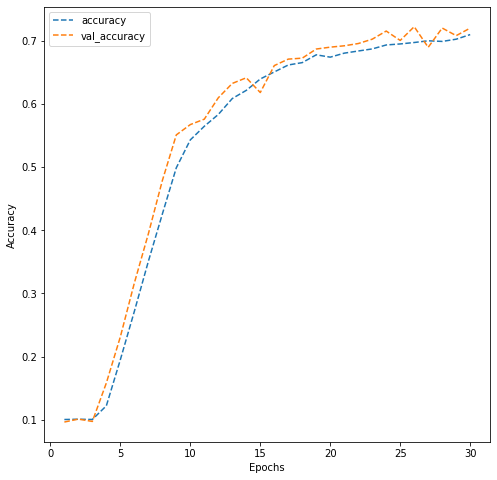

In [ ]:
#Question 5: Write your observations on the below plot (2 Marks)
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Observations: The "Accuracy" and "Val_accuracy" are relativley the same

In [ ]:
#Predictions on the test data
#Make predictions on the test set using the second model
#Print the obtained results using the classification report and the confusion matrix Final observations from the obtained results
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

In [ ]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1814
           1       0.68      0.78      0.73      1828
           2       0.73      0.74      0.74      1803
           3       0.74      0.65      0.69      1719
           4       0.76      0.78      0.77      1812
           5       0.64      0.69      0.67      1768
           6       0.65      0.77      0.70      1832
           7       0.77      0.77      0.77      1808
           8       0.70      0.55      0.62      1812
           9       0.74      0.64      0.69      1804

    accuracy                           0.71     18000
   macro avg       0.72      0.71      0.71     18000
weighted avg       0.72      0.71      0.71     18000



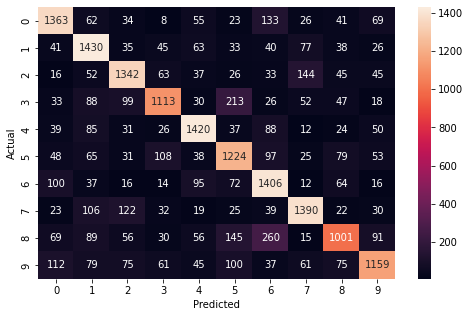

In [ ]:
#Question 6: Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results (4 Marks)
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred) #Write the code for creating confusion matrix using actual labels and predicted labels

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Observations: 
- Class 8 has a poor recall rate. Only about 55% of the relevant labeled digits cropped from street level photos.
- Class 1 & 4 on the other hand, have the highest recall and precision score.
The overall accuracy is 0.78%.